In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pranjubindu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pranjubindu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df=pd.read_csv('genericTrain.csv')

In [3]:
df.head(20)

,sentence,label
0,"i`m so worn out, this week has sped by soo fas...",0
1,Lookin` at spreadsheets so long my eyes are cr...,0
2,Word. Yayy twitter after dark lol.,1
3,"Well, guess we just make a pretty great pair....",0
4,BEEN TOWN WITH THE MOTHER NICE & SUNNNY,1
5,time to leave a passive agressive note to the...,0
6,I don`t think I can bear such cuteness this e...,1
7,its taking forever to upload,0
8,Yay for having a giant headache stupid glasses.,0
9,my twitter looks funny someone help!,0


In [4]:
df.isnull().sum()

sentence    0
label       0
dtype: int64

In [5]:
wordnet=WordNetLemmatizer()

In [6]:
def change_text(a):
    a=str(a)
    text=re.sub('[^a-zA-Z]',' ',a)
    text=text.lower()
    text=nltk.word_tokenize(text)
    text=[wordnet.lemmatize(word) for word in text if word not in stopwords.words('english')]
    text=' '.join(text)
    return text

In [7]:
df['tweet']=df['sentence'].apply(change_text)
df.head()

,sentence,label,tweet
0,"i`m so worn out, this week has sped by soo fas...",0,worn week sped soo fast gon na ask mum go movi...
1,Lookin` at spreadsheets so long my eyes are cr...,0,lookin spreadsheet long eye crossing
2,Word. Yayy twitter after dark lol.,1,word yayy twitter dark lol
3,"Well, guess we just make a pretty great pair....",0,well guess make pretty great pair think birthd...
4,BEEN TOWN WITH THE MOTHER NICE & SUNNNY,1,town mother nice sunnny


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X1= vectorizer.fit_transform(df['tweet'])
y=df['label']

In [9]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=30)

In [10]:
print(cross_val_score(MultinomialNB(),X1,y,cv=cv,scoring='accuracy'))

[0.94248094 0.91961192 0.92099792 0.92307692 0.91961192 0.93139293
 0.93069993 0.92931393 0.92862093 0.93000693]


In [11]:
print(cross_val_score(MultinomialNB(),X1,y,cv=cv,scoring='accuracy').mean())

0.9275814275814277


In [12]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=42)

nb=MultinomialNB()

nb.fit(x_train,y_train)

MultinomialNB()

In [13]:
prediction=nb.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_test,prediction)

array([[ 835,  116],
       [  72, 1142]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.9131639722863741


In [17]:
accessToken="1272053768067010562-u4eunjqdSTtiE68q2J0x2NceCY4Jwx"
accessTokenSecret="8FZbdPVlqW1T5LhL2blrXzJgH9PXcty6wvHW0NFRqiHTR"
consumerKey="F0w2fjOVn4EUAH0MIjhA6lbDY"
consumerKeySecret="Bz5BJwUxx6GlSA7AtENuoXPAfV16UkMTSBngquicAh9PyEuBAX"

In [18]:
auth=tweepy.OAuthHandler(consumerKey,consumerKeySecret)
auth.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(auth)

In [19]:
def cleanText(text):
    text=re.sub('https?://[^\s]+','',text)
    text=re.sub('@[^\s]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]','',text)
    text=re.sub('\n',"",text)
    return text

In [20]:
numOfTweets= int(input('How many tweets to analyze'))
searchWord=input("Topic:")
date_since="2020-03-10"
tweets=tweepy.Cursor(api.search, q=searchWord, lang='en',since=date_since,tweet_mode="extended").items(numOfTweets)

How many tweets to analyze30
Topic:avengers


In [21]:
df_user_tweets=pd.DataFrame([tweet.full_text for tweet in tweets],columns=['Tweets']) 
df_user_tweets['Tweets']=df_user_tweets['Tweets'].apply(cleanText) 
df_user_tweets.drop_duplicates(keep=False,inplace=True) 
print(df_user_tweets)

                                               Tweets
1                       Avengers: Infinity War, 2018 
2   okay so Scarlett witch from the avengers movie...
3    44 days and 14 hours remaining until Marvel’s...
6   The Avengers play rugby in a ballroom dance co...
7     A jobA good upbringingA responsibility towar...
9   All proceeds to charity!  Join the Avengers, s...
10                                         Communism 
11   What if 50% of all life disappeared, like in ...
13          The Remainers are certainly no Avengers 😂
15                                    Heartbreaking. 
16                            Avengers: Infinity War 
17  What if 50% of all life disappeared, like in "...
21   SPOILER ALERT: if you watch Avengers: Age of ...
24   I mean, I'd probably rather watch the Batman ...
26   Avengers are wayyyy better than justice Leagu...
27   16U Mid-Atlantic Select Championship 🏆Champio...
28  The Avengers Box sets FOR SALE.Classic Diana R...


In [22]:
def predict(message):
    if(nb.predict(vectorizer.transform([change_text(message)]))==1):
        return 'Positive'
    else:
        return 'Negavite'

In [23]:
from nltk.corpus import stopwords
df_user_tweets['Analysis']=df_user_tweets['Tweets'].apply(predict)

In [24]:
df_user_tweets.head(100)

,Tweets,Analysis
1,"Avengers: Infinity War, 2018",Positive
2,okay so Scarlett witch from the avengers movie...,Positive
3,44 days and 14 hours remaining until Marvel’s...,Positive
6,The Avengers play rugby in a ballroom dance co...,Negavite
7,A jobA good upbringingA responsibility towar...,Positive
9,"All proceeds to charity! Join the Avengers, s...",Negavite
10,Communism,Positive
11,"What if 50% of all life disappeared, like in ...",Positive
13,The Remainers are certainly no Avengers 😂,Negavite
15,Heartbreaking.,Positive


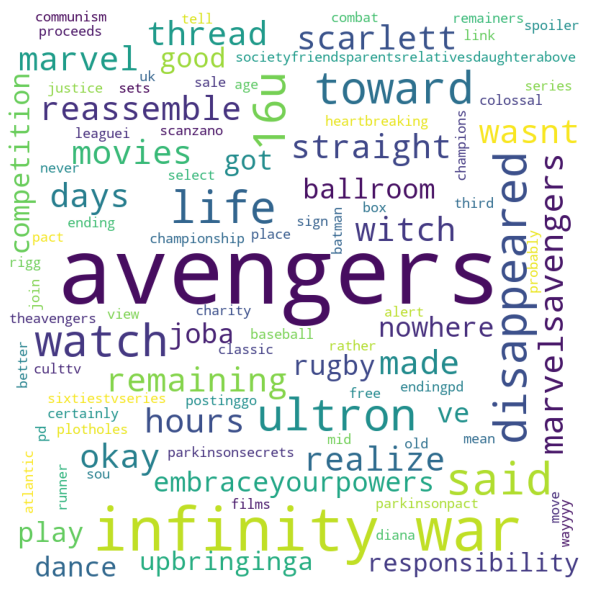

In [25]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 
stopwords = set(STOPWORDS) 
for val in df_user_tweets.Tweets: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<AxesSubplot:xlabel='Analysis', ylabel='count'>

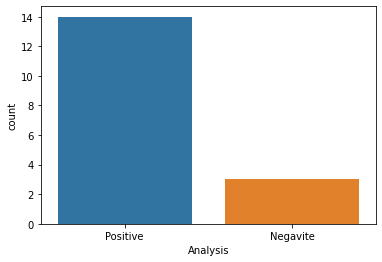

In [26]:
df_user_tweets['Analysis'].value_counts()
sns.countplot('Analysis',data=df_user_tweets)